#  **Tugas 3**

Intan Amelia Sari / 2019104596 

Vaccination Data (31-08-2021)


## Data Acquisition
Melakukan import library yang dibutuhkan untuk proses penelitian ini yang menggunakan bahasa pemograman Python 3.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)

## Extract Raw Data from CSV
Melakukan ekstrak data dari data csv menjadi sebuah data frame.

In [ ]:
dataFrame = pd.read_csv('vaccination-data(31-08-2021).csv', delimiter = ",");
dataFrame.head(5)

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
0,Afghanistan,AFG,EMRO,REPORTING,2021-08-20,1201286.0,770542.0,3.086,1.979,430744.0,1.107,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2021-02-22,4.0
1,Albania,ALB,EURO,OWID,2021-08-27,1427977.0,812555.0,49.620,28.235,615422.0,21.385,"AstraZeneca - AZD1222, Pfizer BioNTech - Comir...",NaN,4.0
2,Algeria,DZA,AFRO,REPORTING,2021-08-23,4146091.0,3421279.0,9.455,7.802,724812.0,1.653,"Beijing CNBG - BBIBP-CorV,Gamaleya - Sputnik V...",2021-01-30,3.0
3,American Samoa,ASM,WPRO,REPORTING,2021-08-20,54425.0,29993.0,98.601,54.338,24977.0,45.251,"Janssen - Ad26.COV 2.5,Moderna - mRNA-1273,Pfi...",2020-12-21,3.0
4,Andorra,AND,EURO,OWID,2021-08-15,91660.0,51044.0,118.631,66.064,40616.0,52.567,"AstraZeneca - AZD1222, Pfizer BioNTech - Comir...",NaN,2.0


Melihat tipe data dari setiap fitur.

In [ ]:
dataFrame.dtypes

COUNTRY                                  object
ISO3                                     object
WHO_REGION                               object
DATA_SOURCE                              object
DATE_UPDATED                             object
TOTAL_VACCINATIONS                      float64
PERSONS_VACCINATED_1PLUS_DOSE           float64
TOTAL_VACCINATIONS_PER100               float64
PERSONS_VACCINATED_1PLUS_DOSE_PER100    float64
PERSONS_FULLY_VACCINATED                float64
PERSONS_FULLY_VACCINATED_PER100         float64
VACCINES_USED                            object
FIRST_VACCINE_DATE                       object
NUMBER_VACCINES_TYPES_USED              float64
dtype: object

Melihat total baris dan fitur.

In [ ]:
print("Total", dataFrame.shape)
print("Dari code diatas dapat diartikan bahwa data memiliki total 227 baris dan 14 fitur dari data ini.")

Total (227, 14)
Dari code diatas dapat diartikan bahwa data memiliki total 227 baris dan 14 fitur dari data ini.


## Five Summary Data Descriptive
Menampilkan Five Number Summary dimana di dalamnya terdapat nilai min, Q1 (25%), Median (50%), Q3 (100%), dan nilai max dari data ini.

In [ ]:
dataFrame.describe()

,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,NUMBER_VACCINES_TYPES_USED
count,2.260000e+02,2.190000e+02,226.000000,219.000000,2.190000e+02,219.000000,223.000000
mean,2.221198e+07,8.830280e+06,66.430588,37.265215,5.315785e+06,29.549616,3.233184
std,1.380741e+08,3.648084e+07,52.135356,27.028802,1.716390e+07,25.318084,1.716211
min,7.300000e+01,3.700000e+01,0.104000,0.092000,3.600000e+01,0.012000,1.000000
25%,1.254152e+05,7.451450e+04,16.759750,11.891500,4.555450e+04,5.941500,2.000000
50%,1.033947e+06,6.435690e+05,57.493000,34.938000,3.680190e+05,24.473000,3.000000
75%,6.774112e+06,4.205376e+06,113.898250,62.100500,2.893240e+06,53.188000,4.000000
max,1.943323e+09,4.608028e+08,233.926000,117.527000,1.727310e+08,116.399000,9.000000


## Data Preprocessing
Ada beberapa tahap yang saya lakukan:

- Data Cleaning
- Data Selection
- Data Integration

## Data Cleaning

Pada tahap data cleaning ada 2 tahap yang saya lakukan, yaitu:
- Menghilangkan data duplikat
- Menghilangkan data NaN atau Null

### Menghilangkan Data Duplikat

In [ ]:
duplicate_rows = dataFrame[dataFrame.duplicated()]
print("Data duplikat (Baris, Kolom):", duplicate_rows.shape)

Data duplikat (Baris, Kolom): (0, 14)


Karena data duplikat pada baris tidak ditemukan berarti proses ini sudah selesai.

### Menghilangkan Data NaN atau Null

In [ ]:
dataFrame.isnull().sum() # Mencari jumlah data yang NaN atau Null pada setiap fitur sebelum data dibersihkan.

COUNTRY                                  0
ISO3                                     0
WHO_REGION                               0
DATA_SOURCE                              0
DATE_UPDATED                             0
TOTAL_VACCINATIONS                       1
PERSONS_VACCINATED_1PLUS_DOSE            8
TOTAL_VACCINATIONS_PER100                1
PERSONS_VACCINATED_1PLUS_DOSE_PER100     8
PERSONS_FULLY_VACCINATED                 8
PERSONS_FULLY_VACCINATED_PER100          8
VACCINES_USED                            4
FIRST_VACCINE_DATE                      71
NUMBER_VACCINES_TYPES_USED               4
dtype: int64

In [ ]:
dataFrame.count() # Total data setiap fitur sebelum data dibersihkan.

COUNTRY                                 227
ISO3                                    227
WHO_REGION                              227
DATA_SOURCE                             227
DATE_UPDATED                            227
TOTAL_VACCINATIONS                      226
PERSONS_VACCINATED_1PLUS_DOSE           219
TOTAL_VACCINATIONS_PER100               226
PERSONS_VACCINATED_1PLUS_DOSE_PER100    219
PERSONS_FULLY_VACCINATED                219
PERSONS_FULLY_VACCINATED_PER100         219
VACCINES_USED                           223
FIRST_VACCINE_DATE                      156
NUMBER_VACCINES_TYPES_USED              223
dtype: int64

In [ ]:
dataFrame = dataFrame.dropna() # Menghilangkan data NaN atau Null

In [ ]:
dataFrame.isnull().sum() # Menampilkan total data yang NaN atau Null setelah data dibersihkan

COUNTRY                                 0
ISO3                                    0
WHO_REGION                              0
DATA_SOURCE                             0
DATE_UPDATED                            0
TOTAL_VACCINATIONS                      0
PERSONS_VACCINATED_1PLUS_DOSE           0
TOTAL_VACCINATIONS_PER100               0
PERSONS_VACCINATED_1PLUS_DOSE_PER100    0
PERSONS_FULLY_VACCINATED                0
PERSONS_FULLY_VACCINATED_PER100         0
VACCINES_USED                           0
FIRST_VACCINE_DATE                      0
NUMBER_VACCINES_TYPES_USED              0
dtype: int64

In [ ]:
dataFrame.count() # Total data setiap fitur setelah data dibersihkan.

COUNTRY                                 150
ISO3                                    150
WHO_REGION                              150
DATA_SOURCE                             150
DATE_UPDATED                            150
TOTAL_VACCINATIONS                      150
PERSONS_VACCINATED_1PLUS_DOSE           150
TOTAL_VACCINATIONS_PER100               150
PERSONS_VACCINATED_1PLUS_DOSE_PER100    150
PERSONS_FULLY_VACCINATED                150
PERSONS_FULLY_VACCINATED_PER100         150
VACCINES_USED                           150
FIRST_VACCINE_DATE                      150
NUMBER_VACCINES_TYPES_USED              150
dtype: int64

## Data Selection

Pada tahap data selection saya melakukan drop fitur yang tidak relevan.

In [ ]:
dataFrame = dataFrame.drop(columns = {"FIRST_VACCINE_DATE"}, axis = 1) # Menghilangkan fitur yang tidak relevan.

In [ ]:
dataFrame.shape # Menampilkan sisa fitur yang akan dipakai.

(150, 13)

In [ ]:
dataFrame.head(5) # Menampilkan data terbaru 

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,NUMBER_VACCINES_TYPES_USED
0,Afghanistan,AFG,EMRO,REPORTING,2021-08-20,1201286.0,770542.0,3.086,1.979,430744.0,1.107,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",4.0
2,Algeria,DZA,AFRO,REPORTING,2021-08-23,4146091.0,3421279.0,9.455,7.802,724812.0,1.653,"Beijing CNBG - BBIBP-CorV,Gamaleya - Sputnik V...",3.0
3,American Samoa,ASM,WPRO,REPORTING,2021-08-20,54425.0,29993.0,98.601,54.338,24977.0,45.251,"Janssen - Ad26.COV 2.5,Moderna - mRNA-1273,Pfi...",3.0
5,Angola,AGO,AFRO,REPORTING,2021-08-23,1869933.0,1025212.0,5.690,3.119,844721.0,2.570,SII - Covishield,1.0
6,Anguilla,AIA,AMRO,REPORTING,2021-08-27,18458.0,9493.0,123.037,63.278,8965.0,59.759,AstraZeneca - Vaxzevria,1.0


## Data Integration

Pada tahap ini saya melakukan rename fitur untuk memudahkan pembacaan.

In [ ]:
# Rename fitur
dataFrame_initial = dataFrame.rename(columns = {
    "NUMBER_VACCINES_TYPES_USED": "VACCINES_CODES",
   
})

dataFrame_initial.head(5)

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,VACCINES_CODES
0,Afghanistan,AFG,EMRO,REPORTING,2021-08-20,1201286.0,770542.0,3.086,1.979,430744.0,1.107,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",4.0
2,Algeria,DZA,AFRO,REPORTING,2021-08-23,4146091.0,3421279.0,9.455,7.802,724812.0,1.653,"Beijing CNBG - BBIBP-CorV,Gamaleya - Sputnik V...",3.0
3,American Samoa,ASM,WPRO,REPORTING,2021-08-20,54425.0,29993.0,98.601,54.338,24977.0,45.251,"Janssen - Ad26.COV 2.5,Moderna - mRNA-1273,Pfi...",3.0
5,Angola,AGO,AFRO,REPORTING,2021-08-23,1869933.0,1025212.0,5.690,3.119,844721.0,2.570,SII - Covishield,1.0
6,Anguilla,AIA,AMRO,REPORTING,2021-08-27,18458.0,9493.0,123.037,63.278,8965.0,59.759,AstraZeneca - Vaxzevria,1.0


# Data Visualization

Pada tahap ini adalah tahap peng-visualisasian data, dimana data yang akan divisualisasikan berupa beberapa plot yaitu:
- Line Plot
- Bar Plot
- Pie Plot
- Box Plot

In [ ]:
# Define Function

def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

## Box Plot

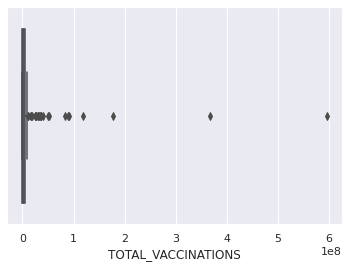

In [ ]:
sns.boxplot(x = dataFrame_initial['TOTAL_VACCINATIONS'])

In [ ]:
dataFrame_initial['TOTAL_VACCINATIONS'].describe() # Five Number Summary

count    1.500000e+02
mean     1.507226e+07
std      6.038638e+07
min      7.300000e+01
25%      1.214898e+05
50%      6.055835e+05
75%      4.440829e+06
max      5.955046e+08
Name: TOTAL_VACCINATIONS, dtype: float64

In [ ]:
# Outliers Detection

Q1 = dataFrame_initial['TOTAL_VACCINATIONS'].quantile(0.25)
Q3 = dataFrame_initial['TOTAL_VACCINATIONS'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print("Batas Bawah = ", lower_bound)
print("Batas Atas = ", upper_bound)
print("Jadi apapun yang berada diluar", lower_bound, " dan", upper_bound, " merupakan Outlier")

Batas Bawah =  -6357519.125
Batas Atas =  10919837.875
Jadi apapun yang berada diluar -6357519.125  dan 10919837.875  merupakan Outlier


## Bar Plot

* Region mana yang paling banyak melakukan vaksin?

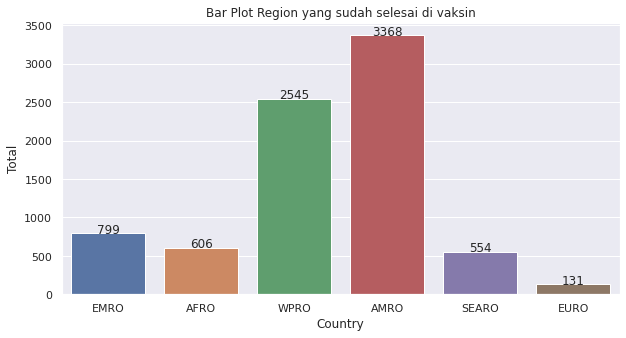

In [ ]:
dataAge = dataFrame["WHO_REGION"].unique()
data = []

for c in dataAge:
    d = dataFrame[dataFrame["WHO_REGION"] == c]
    counts = d["TOTAL_VACCINATIONS_PER100"].sum()
    data.append([c, counts])
    
dt = pd.DataFrame(data, columns = ["Country", "Total"])

plt.figure(figsize=(10,5))
plt.title("Bar Plot Region yang sudah selesai di vaksin")

ax = sns.barplot(x="Country", y="Total", data=dt)
        
show_values_on_bars(ax, "v", 0.10)

Kesimpulan:
Pada Bar Plot pertama ini dapat disimpulkan bahwa region WHO yang sudah vaksin terbanyak adalah region **AMRO**, sedangkan region yang paling sedikit di vaksin adalah region **EURO**

* Region mana yang paling banyak melaporkan data vaksinasinya? 

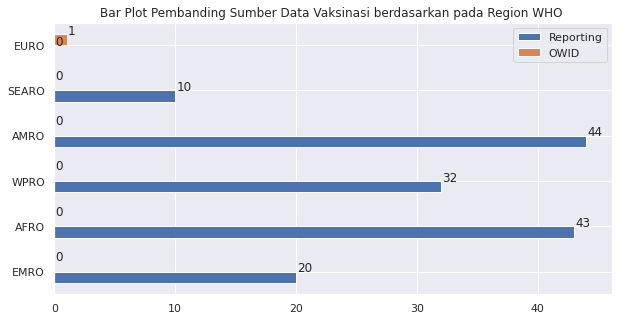

In [ ]:
dataReg = dataFrame["WHO_REGION"].unique()
data = []

for c in dataReg:
    d = dataFrame[dataFrame["WHO_REGION"] == c]
    REPORTING	 = d["DATA_SOURCE"].str.count("REPORTING").sum()
    OWID = d["DATA_SOURCE"].str.count("OWID").sum()
    data.append([c, REPORTING, OWID])

dt = pd.DataFrame(data, columns = ["Region", "Reporting", "OWID"])
dtReg = []
dtReporting = []
dtOwid = []

for h in dt["Region"]:
    dtReg.append(h)

for j in dt["Reporting"]:
    dtReporting.append(j)
    
for q in dt["OWID"]:
    dtOwid.append(q)

dts = pd.DataFrame({'Reporting': dtReporting, 'OWID': dtOwid}, index = dtReg)
ax = dts.plot.barh(figsize=(10,5), title="Bar Plot Pembanding Sumber Data Vaksinasi berdasarkan pada Region WHO ")
        
show_values_on_bars(ax, "h", 0.10)

Kesimpulan : Hampir semua negara yang tergabung Region WHO melaporkan data vaksinasi, kecuali Region EURO. Data vaksinasi Region EURO didapatkan secara OWID/publik

* Total Vaksinasi pada setiap Region WHO


Saya mengambil data dari 20 data teratas

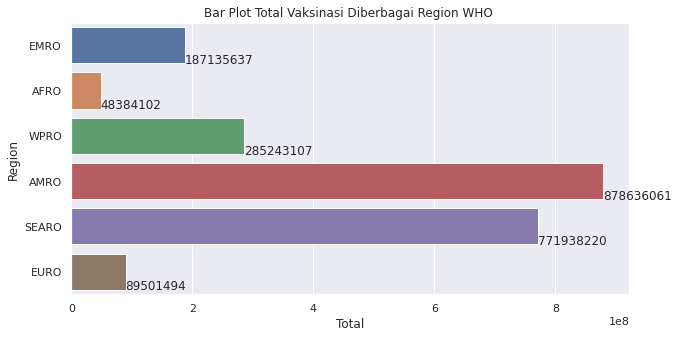

In [ ]:
data = []

dataRegion = dataFrame["WHO_REGION"].unique()
for c in dataRegion:
    d = dataFrame[dataFrame["WHO_REGION"] == c]
    Sum = d["TOTAL_VACCINATIONS"].sum()
    data.append([c, Sum])

data = pd.DataFrame(data, columns = ["Region", "Total"])
get = data.head(20);

plt.figure(figsize=(10,5))
plt.title("Bar Plot Total Vaksinasi Diberbagai Region WHO ")

ax = sns.barplot(x="Total", y="Region", data=get)
        
show_values_on_bars(ax, "h", 0.10)

Kesimpulan : Jumlah vaksinasi terbanyak adalah Region **AMRO**, sedangkan jumlah vaksinasi paling sedikit adalah Region **AFRO**

## Line PLot 

Apakah dari waktu ke waktu ada peningkatan jumlah vaksinasi? 

Saya mengambil data dari 5 Tanggal teratas

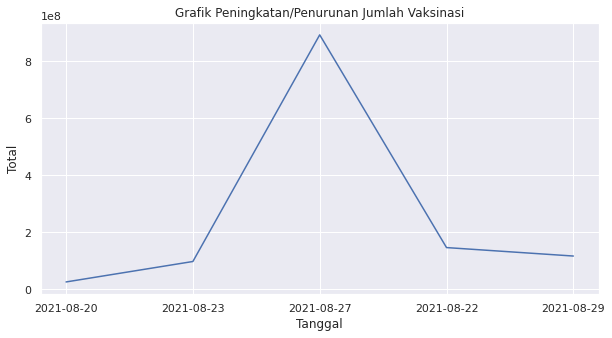

In [ ]:
dataYear = dataFrame["DATE_UPDATED"].unique()
data = []

for c in dataYear:
    d = dataFrame[dataFrame["DATE_UPDATED"] == c]
    Sum = d["TOTAL_VACCINATIONS"].sum()
    data.append([c, Sum])

data = pd.DataFrame(data, columns = ["Tanggal", "Total"])
get = data.head(5);

plt.figure(figsize=(10,5))
plt.title("Grafik Peningkatan/Penurunan Jumlah Vaksinasi")
ax = sns.lineplot(x="Tanggal", y="Total", data=get)

Kesimpulan : Total Vaksinasi tertinggi pada tanggal 27 Agustus 2021. Tanggal Update pada data Vaccination ini tidak tersusun secara berurutan, sehingga grafik diatas pun tidak menggambarkan data secara berurutan

## Pie Plot 

Region manakah yang paling banyak melakukan vaksin? 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


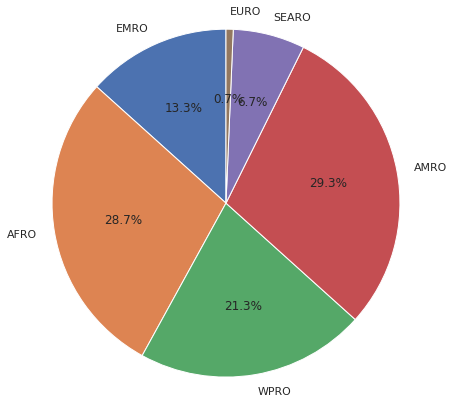

In [ ]:
dataRegion = dataFrame["WHO_REGION"].unique()
data = [];

for s in dataRegion:
    tot = dataFrame["WHO_REGION"].str.count(s).sum()
    data.append([s, tot])

data = pd.DataFrame(data, columns = ["Region", "Total"])

value = data["Total"]
labels = data["Region"]
plt.pie(value, labels = labels, autopct = "%1.1f%%", radius=2, startangle=90)
plt.axes().set_aspect("equal")
plt.show()

Kesimpulan : Dari Pie Plot diatas maka dapat disimpulkan bahwa negara yang tergabung dalam Region AMRO (29,3%) dan Region AFRO (28,7%) paling banyak melakukan vaksinasi, dua Region ini hanya selisih 0,6%. 